# Изучение и обработка данных

In [68]:
#имопртирую необходимые для работы библиотеки 
from scipy import stats as st
from math import factorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#чтение файла с данными
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv')

In [70]:
games.head(20)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [71]:
#Обзор DataFrame 'Games'
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Я ознакомился с таблицей и заметил, что тип данных в столбцах не всегда правильный, например пользовательский рейтинг с типом (object) или год выпуска с типом (float). Так же нужно обработать пропуски, проверить на наличие дубликатов, по возможности заполнить пропуски и сгруппировать данные для наглядности.
Приступаю к обработке данных!

# Предобработка данных 

In [72]:
#Осуществляю замену столбцов, привожу к нижнему регистру.
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

В столбце год выпуска, изменим тип данных на целочисленный.


In [73]:
#Посчитаем количество пропусков в столбце 'год выпуска'
print(games['year_of_release'].isna().sum()) # Количество пропусков
games['year_of_release'].isna().sum()/len(games['year_of_release']) # Доля пропусков

269


0.01609332934489979

In [74]:
games = games.dropna(subset=['year_of_release']) #удаляем пропуски 
games['year_of_release']= games['year_of_release'].astype('int')#заменяю тип данных
games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [75]:
games.dropna(subset='name', inplace=True) #удаляем строки с незаполненными значениями name

я перезапустил и все работает, товарищ ревьюер!

In [76]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

wikipedia подсказывает:
Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.
«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone»:
«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults"):
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики:
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории:
«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году:
«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:
Значения 'K-A', 'EC', меняем на E.


In [77]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'
games.loc[games['rating'] == 'EC', 'rating'] = 'E'


In [78]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [79]:
#Заменим "tbd" на Nan
games.loc[games['user_score']=="tbd", 'user_score']=np.nan
#Заменим тип данных пользовательского рейтинга с текстового на числовой с плавающей точкой
games['user_score'] = games['user_score'].astype('float64')

In [80]:
#сумарные продажи
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [81]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Промежуточный вывод:
В 'user_score' есть значения с аббревиатурой 'tbd', которые не позволяют изменить тип данных. Порядка 15% строк с такой аббревиатурой. Переводится, как "подлежит уточнению".
Явных закономерностей не прослеживается, использовать число (заменить tbd на 0) мы не можем, иначе замененные tbd могут повлиять на оценку рейтингов. Поэтому присвоим значение NaN.
Затем были обнаружены 2 строки с отсуствием данных в name и genre,удаляем.Возможно в 1993 году еще не составляли рейтинги на постоянной основе и не все игры их имели.Удалим эти строки.
Кажется, что можно частично заменить пропуски на год, указанный в названии игры.
Но как показывает практика, года в названиях и по факту выпуска могут не соответствовать, так как часть игр выходит заранее (спортивные игры в частности). Поэтому мы не можем ни чем заменить пропуски.
Как видим, пропуски в оценках и рейтингах не зависят от платформы, есть и в старые в современных играх. Даже одна и та же игра на разных платформах может иметь разные рейтинги. Я не вижу эффективного способа заполнения пропусков, чтобы не исказить данные.
Поэтому оставляем как есть, и будем использовать для анализа то, что имеем.
Причинами появления таких пропусков могут быть и ошибки выгрузки данных и человеческих фактор и что-то другое.

# Приступаю к исследовательскому анализу.


In [82]:
#сколько игр выпускалось в разные годы
year_of_release = games.groupby('year_of_release')['name'].count().sort_values().reset_index()
year_of_release.columns = ['year', 'sum']
year_of_release

,year,sum
0,1980,9
1,1984,14
2,1985,14
3,1988,15
4,1990,16
5,1987,16
6,1989,17
7,1983,17
8,1986,21
9,1982,36


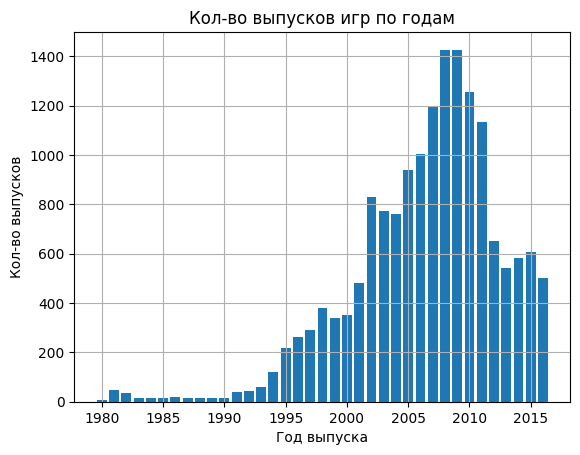

In [83]:
plt.bar(year_of_release['year'], year_of_release['sum'], label='Кол-во выпусков в год')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во выпусков')
plt.grid()
plt.title(f'Кол-во выпусков игр по годам')
plt.show();

Судя по графику мы можем сказать, что в 1995 году произошел резкий скачек в игровой индустрии, к 2001 году технологии становятся неотъемлемой частью нашей жизни, поэтому игры плотно входят в нашу жизнь. Так же мы можем обратить спать, в 2012 году это может быть связано с развитием мобильных игр и оттока аудитории.


In [84]:
#Продажи по платформам
games.groupby('platform')['total_sales'].sum().sort_values().reset_index()

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [85]:
#Создаю Топ10 платформ по продажам
games_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
games_platform

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


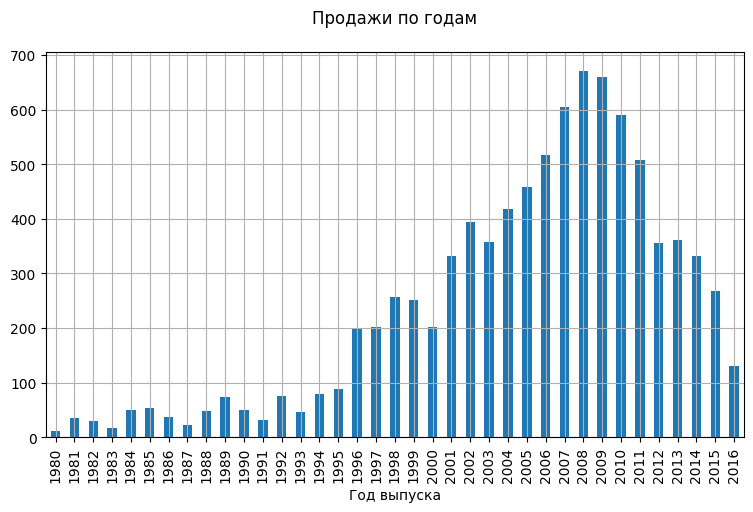

In [86]:
games.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='bar', figsize=(9,5))
plt.title('Продажи по годам\n  ')
plt.xlabel('Год выпуска')
plt.grid(True)
plt.show();

In [87]:
#Создадим переменную, хранящую список Топ10 продаж платформ
top_platforms = games_platform['platform'].to_list()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [88]:
#Создадим новый датасет, отфильтровав старый по названиям платформ, хранящимся в переменной
games_new_top = games.query('platform in @top_platforms')
games_new_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


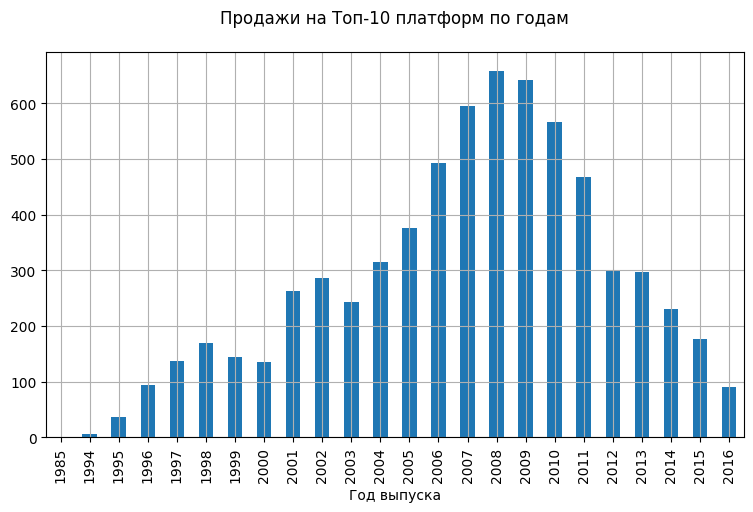

In [89]:
games_new_top.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='bar', figsize=(9,5))
plt.title('Продажи на Топ-10 платформ по годам\n  ')
plt.xlabel('Год выпуска')
plt.grid(True)
plt.show();

Топ 10 не включает в себя 1995 год, что показывает нам неактуальность этоо периода.


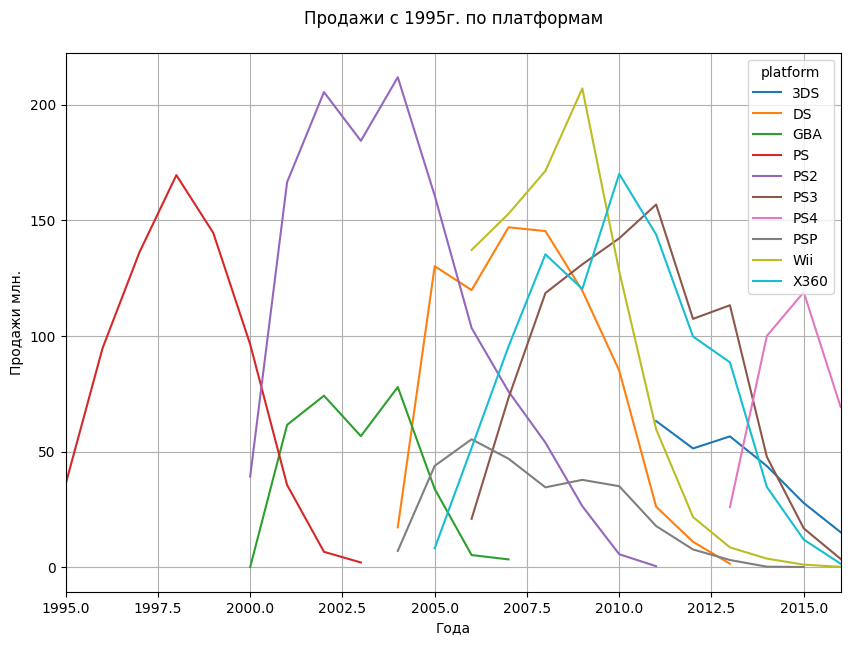

In [90]:
#Теперь построим распределение по годам для каждой из Топ10 платформ
#
pd.pivot_table(games_new_top , index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,7),xlim=(1995,2016))
plt.grid(True)
plt.title('Продажи с 1995г. по платформам\n  ')
plt.xlabel('Года')
plt.ylabel('Продажи млн.')
plt.show()

In [91]:
#Сколько лет "живет" Топ10 платформ
df_new_top_years = games_new_top.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
df_new_top_years['platform'].value_counts()

PS2     12
PSP     12
X360    12
DS      11
PS3     11
Wii     11
PS      10
GBA      8
3DS      6
PS4      4
Name: platform, dtype: int64

В среднем платформы находятся на рынке 11 лет.


In [92]:
#Определение актуального периода
games.query('year_of_release > 2005').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,116.0,93.0,91.0,80.0,86.0,46.0
DC,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,NaN,NaN,NaN
GBA,39.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,40.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,52.0,62.0,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS2,259.0,214.0,191.0,96.0,38.0,7.0,NaN,NaN,NaN,NaN,NaN
PS3,27.0,90.0,138.0,162.0,181.0,215.0,148.0,126.0,108.0,73.0,38.0
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,75.0,137.0,164.0


На основе полученных данных, мы можем заметить, что платформы 2006 года, сменяются новыми, поэтому возьмем актуальный период с 2011 года.


In [93]:
#Поиск потенциально прибыльных платформ 
games_actual_years = games[games['year_of_release'] >= 2011]
games_actual_years.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,116.0,93.0,91.0,80.0,86.0,46.0
DS,153.0,23.0,8.0,NaN,NaN,NaN
PC,139.0,61.0,38.0,47.0,50.0,54.0
PS2,7.0,NaN,NaN,NaN,NaN,NaN
PS3,215.0,148.0,126.0,108.0,73.0,38.0
PS4,NaN,NaN,16.0,75.0,137.0,164.0
PSP,139.0,106.0,54.0,10.0,3.0,NaN
PSV,18.0,53.0,63.0,100.0,110.0,85.0
Wii,143.0,31.0,12.0,6.0,4.0,1.0


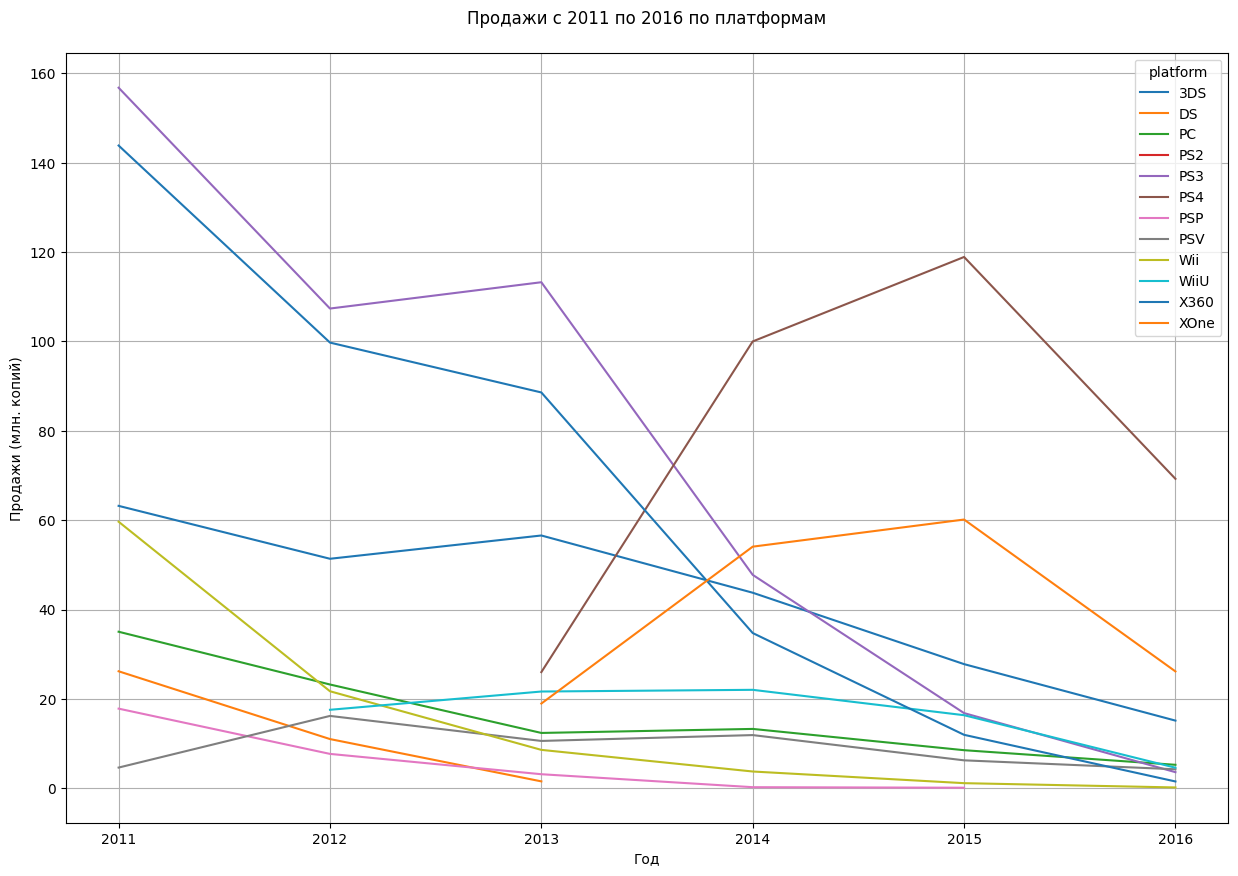

In [94]:
#Построим графики динамики продаж Топ10 платформ за актуальный период
#
pd.pivot_table(games_actual_years, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,10))
plt.grid(True)
plt.title('Продажи с 2011 по 2016 по платформам\n  ')
plt.xlabel('Год')
plt.ylabel('Продажи (млн. копий)')
plt.show()

Все платформы заметно теряют в продажах. Наиболее стабильные продажи по сравнению с другими платформами имеют 'PS4', а так же 'XOne'.


In [95]:
#Список Топ5 перспективных платформ
top5_platform_name = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV']

#Продажи Топ5 перспективных платформ
top5_platform = games_actual_years.query('platform in @top5_platform_name').groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top5_platform

,platform,total_sales
0,PS4,314.14
1,3DS,257.81
2,XOne,159.32
3,WiiU,82.19
4,PSV,53.81


(0.0, 1.25)

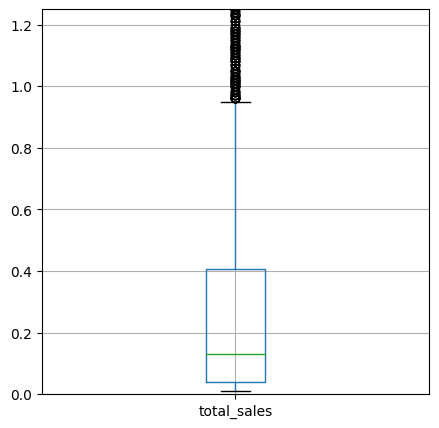

In [96]:
#Построение графика с усами по глобальным продажам.
games_actual_years.boxplot('total_sales', figsize=(5,5))
plt.ylim(0,1.25)

In [97]:
games_actual_years['total_sales'].describe()

count    4022.000000
mean        0.485855
std         1.219503
min         0.010000
25%         0.040000
50%         0.130000
75%         0.407500
max        21.050000
Name: total_sales, dtype: float64

In [98]:
games_actual_5 = games_actual_years.query('platform in @top5_platform_name')

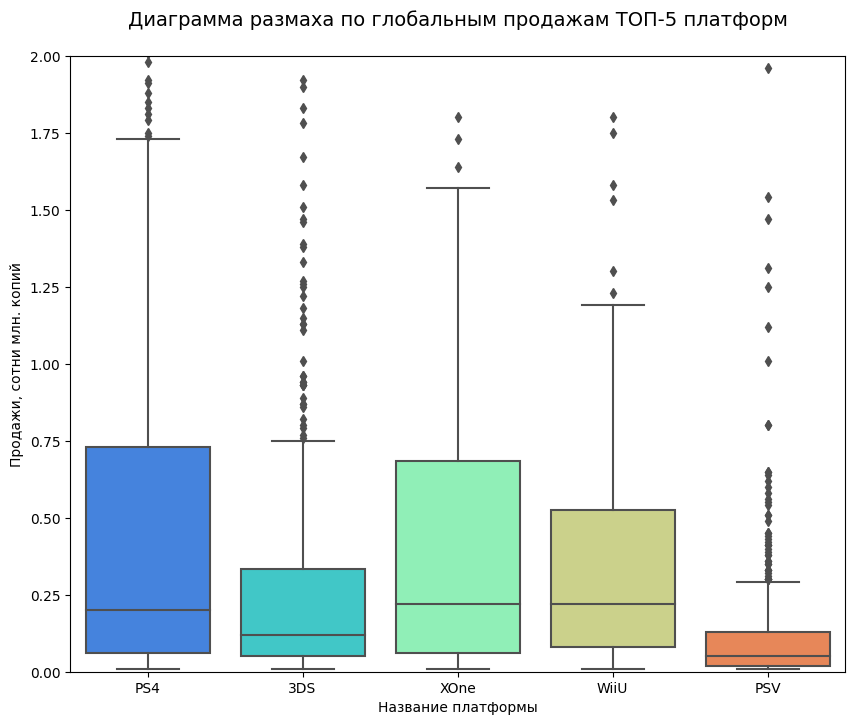

In [99]:
#"Ящик с усами" по глобальным продажам за актуальный период по каждой перспективной платформе: 
#
plt.figure(figsize=(10, 8))
plt.ylim(0, 2)
sns.boxplot(x="platform", y="total_sales", data = games_actual_5 , palette='rainbow')
plt.title('Диаграмма размаха по глобальным продажам ТОП-5 платформ\n  ', fontsize=14)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название платформы');

In [100]:
#Глобальные продажи по актуальным платформам

df_actual_years_5 = games_actual_5.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
df_actual_years_5['all_years'] = df_actual_years_5.sum(axis=1)
df_actual_years_5

year_of_release,2011,2012,2013,2014,2015,2016,all_years
platform,,,,,,,
3DS,63.20,51.36,56.57,43.76,27.78,15.14,257.81
PS4,NaN,NaN,25.99,100.00,118.90,69.25,314.14
PSV,4.63,16.19,10.59,11.90,6.25,4.25,53.81
WiiU,NaN,17.56,21.65,22.03,16.35,4.60,82.19
XOne,NaN,NaN,18.96,54.07,60.14,26.15,159.32


За последние шесть лет мы можем сделать следующий вывод, что наибольший объем продаж составяляет у платформ: '3DS','PS4','XOne'. Но у 3DS, были большие продаж в 2011 году, затем наблюдается спад. Так же стоит отметить высокие медианной значение у таки хпалтформ как: 'PS4','XOne','WiiU'.

In [101]:
#Оценка пользователей
filtered_PS4 = games_actual_years.query('platform == "PS4"')
filtered_PS4 = filtered_PS4[['critic_score', 'user_score', 'total_sales']]
filtered_PS4.head()

,critic_score,user_score,total_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66


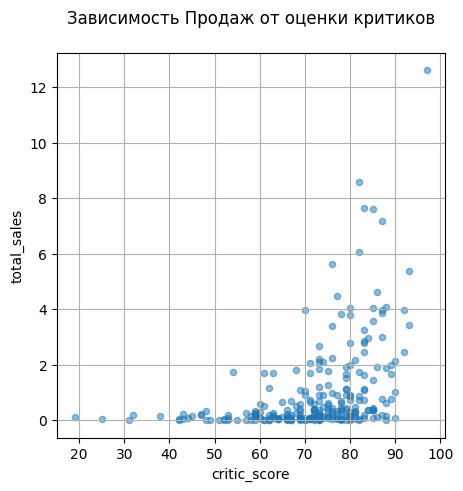

In [102]:
#Диаграмма рассеяния 
filtered_PS4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), alpha=0.5, grid=True)
plt.title('Зависимость Продаж от оценки критиков\n  ');

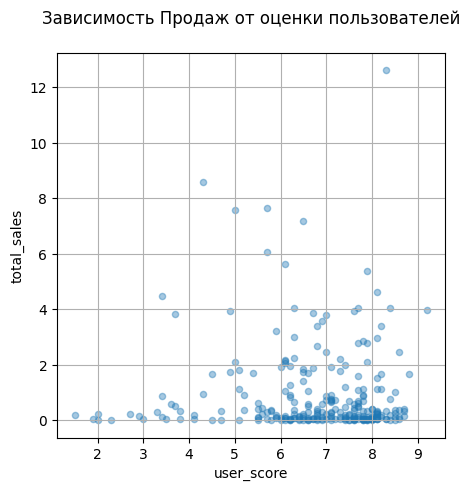

In [103]:
#Диаграмма рассеяния 
filtered_PS4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), alpha=0.4, grid=True)
plt.title('Зависимость Продаж от оценки пользователей\n  ');

Оценка критиков и пользователей, никак не отражается на продажи игр.


In [104]:
#Рассчитаем корреляцию
filtered_PS4.corr().round(3)

,critic_score,user_score,total_sales
critic_score,1.000,0.558,0.407
user_score,0.558,1.000,-0.032
total_sales,0.407,-0.032,1.000


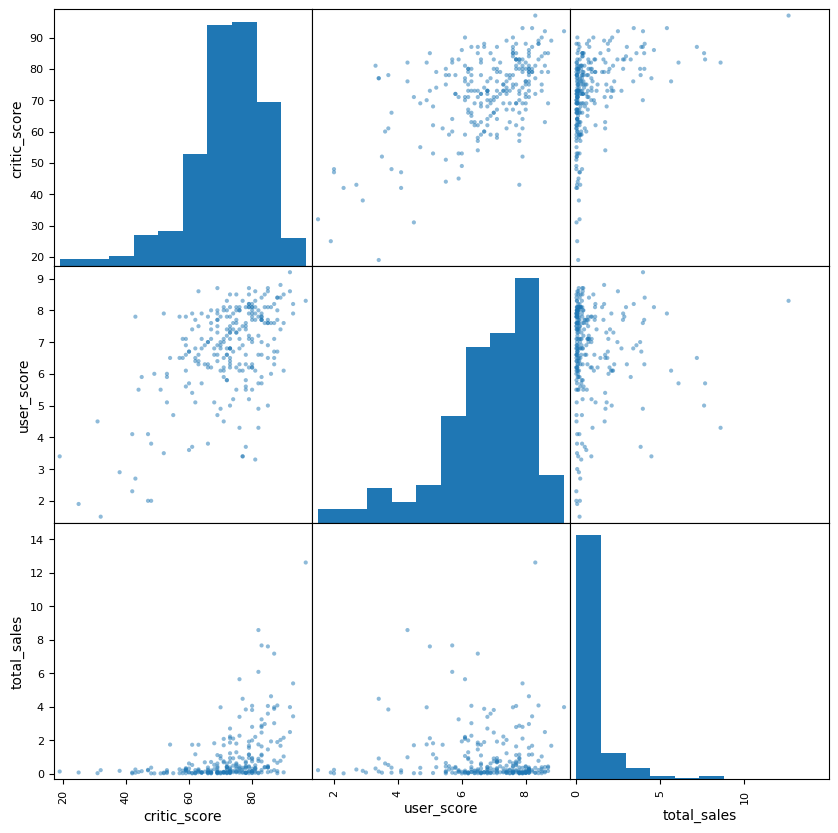

In [105]:
pd.plotting.scatter_matrix(filtered_PS4, figsize=(10,10), alpha=0.5)
plt.ticklabel_format(useOffset=False)

Положительная средняя корреляция между оценкой критиков и пользователей.
Критики могут учитывать мнение пользоватлей в своих оценках и наоборот

In [106]:
games_actual_years.query('platform == "3DS"')[['critic_score', 'user_score', 'total_sales']].corr().round(3)

,critic_score,user_score,total_sales
critic_score,1.000,0.745,0.349
user_score,0.745,1.000,0.222
total_sales,0.349,0.222,1.000


In [107]:
games_actual_years.query('platform == "XOne"')[['critic_score', 'user_score', 'total_sales']].corr().round(3)

,critic_score,user_score,total_sales
critic_score,1.000,0.472,0.417
user_score,0.472,1.000,-0.069
total_sales,0.417,-0.069,1.000


In [108]:
games_actual_years.query('platform == "WiiU"')[['critic_score', 'user_score', 'total_sales']].corr().round(3)

,critic_score,user_score,total_sales
critic_score,1.000,0.77,0.348
user_score,0.770,1.00,0.400
total_sales,0.348,0.40,1.000


In [109]:
games_actual_years.query('platform == "PSV"')[['critic_score', 'user_score', 'total_sales']].corr().round(3)

,critic_score,user_score,total_sales
critic_score,1.000,0.734,0.132
user_score,0.734,1.000,0.013
total_sales,0.132,0.013,1.000


,critic_score,user_score,total_sales
critic_score,1.00,0.58,0.35
user_score,0.58,1.00,0.05
total_sales,0.35,0.05,1.00


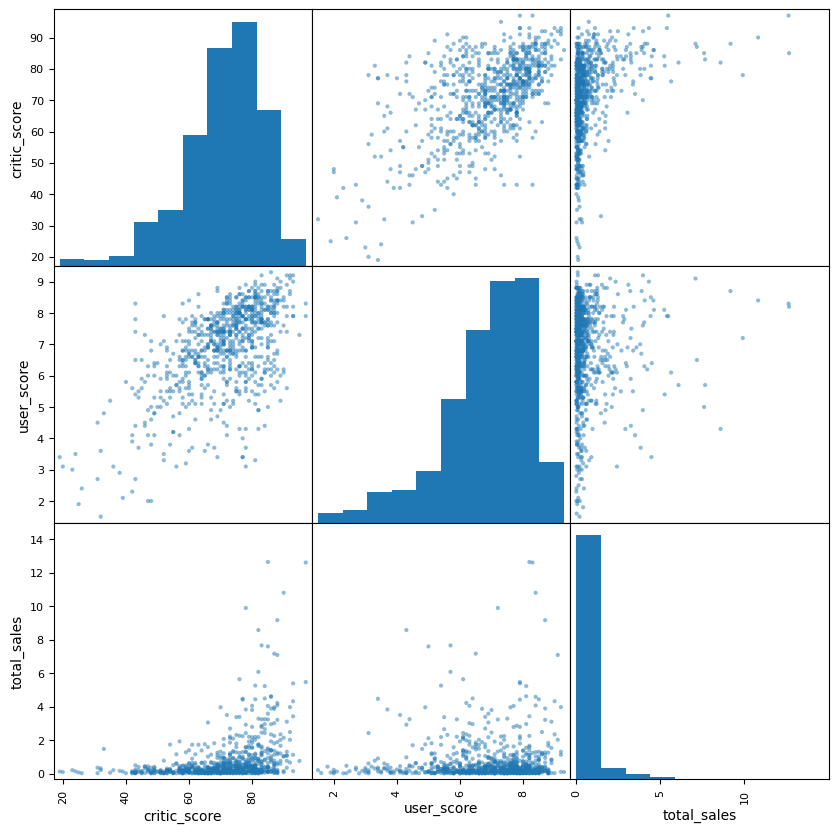

In [110]:
pd.plotting.scatter_matrix(games_actual_5[['critic_score', 'user_score', 'total_sales']], figsize=(10,10), alpha=0.5);
games_actual_5[['critic_score', 'user_score', 'total_sales']].corr().round(2)

Для остальных платформ мы видим более выраженную корреляцию между оценками (> 0.7), а значит существует положительная связь - чем выше оценки критиков, тем выше оценки пользователей и наоборот. Связь между оценками и количеством проданных копий положительная, но очень слабая (не более 0.42), мы не можем брать её в расчёт.

При оценки общей корреляции, можно говорить о невысокой положительной связи (0.53) оценки критиков и оценки пользователей.

In [111]:
#Анализ распределения по жанрам
games_actual_5['genre'].value_counts()

Action          629
Role-Playing    244
Adventure       175
Sports          140
Misc            139
Shooter         100
Platform         71
Racing           63
Fighting         60
Simulation       44
Strategy         34
Puzzle           28
Name: genre, dtype: int64

In [112]:
games_actual_5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [113]:
#Самые прибыльные жанры
df_genre = games_actual_5.groupby(['genre'])\
                        .agg({'total_sales':'median', 'name':'count'})\
                        .rename(columns={'name':'name_count'})\

df_genre.sort_values(by = 'total_sales', ascending=False)

,total_sales,name_count
genre,,
Shooter,0.680,100
Platform,0.250,71
Sports,0.235,140
Racing,0.230,63
Role-Playing,0.150,244
Simulation,0.145,44
Fighting,0.140,60
Misc,0.120,139
Action,0.110,629


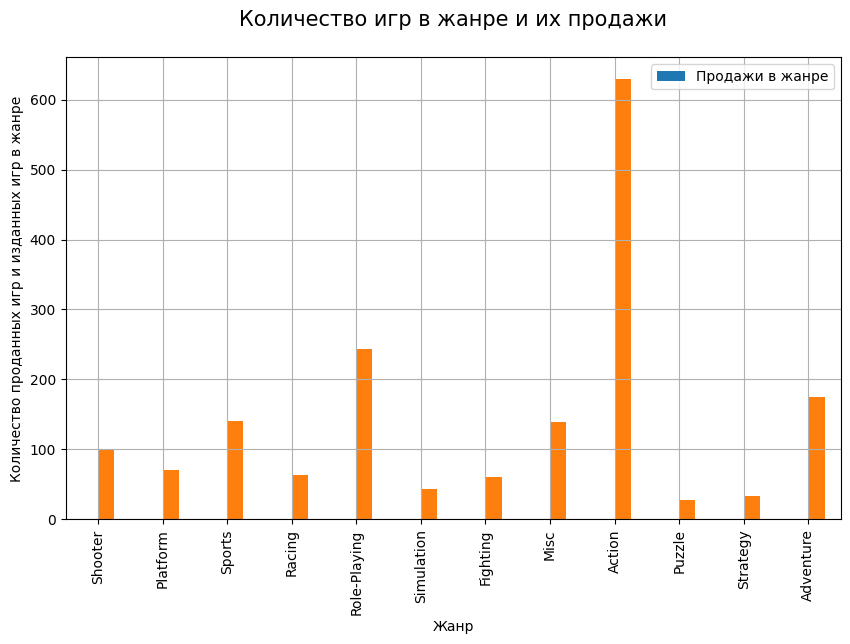

In [114]:
ax=df_genre[['total_sales', 'name_count']].sort_values(by = 'total_sales', ascending=False).plot(kind='bar', figsize=(10, 6))

plt.title('Количество игр в жанре и их продажи\n  ', fontsize=15)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр и изданных игр в жанре')
plt.legend(['Продажи в жанре'])
plt.grid(True)
plt.show()

Вывод:
После заполнения медианным значением можно сказать, что самые продаваемые жанры - Action,Adventure,Sports Role-Playing, Platform.
Выделен актуальный период с 2011-2016, эти данные помогут построить прогноз на 2017г.
Перспективными платформами являются: PS4,XOne,WiiU.
Оценки пользователей и критиков не имею выраженного влияния на объемы продаж, но оценки влияют друг на друга.

# Составление портрета пользователя каждого региона

In [115]:
#Cоставление портрета пользователя каждого региона
games_actual_5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


In [116]:
games_actual_5[['na_sales', 'eu_sales', 'jp_sales']].describe()

,na_sales,eu_sales,jp_sales
count,1727.000000,1727.000000,1727.000000
mean,0.194024,0.169166,0.087881
std,0.506066,0.492371,0.306206
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.030000,0.020000,0.020000
75%,0.160000,0.120000,0.060000
max,6.030000,6.310000,4.390000


In [117]:
#Самые популярные платформы топ-5
games_platform = games_actual_5.groupby(['platform'])\
                        .agg({'na_sales':'sum'})\
                      

games_platform.sort_values(by = 'na_sales', ascending=False)

,na_sales
platform,
PS4,108.74
XOne,93.12
3DS,82.65
WiiU,38.10
PSV,12.47


In [118]:
games_na_platform = games_actual_5.groupby(['platform']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print(  )
print('Северная Америка Топ-5')
display(games_na_platform)

games_eu_platform = games_actual_5.groupby(['platform']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print(  )
print('Европа Топ-5')
display(games_eu_platform)
 
games_jp_platform = games_actual_5.groupby(['platform']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print(  )
print('Япония Топ-5')
display(games_jp_platform)


Северная Америка Топ-5


,platform,na_sales
1,PS4,108.74
4,XOne,93.12
0,3DS,82.65
3,WiiU,38.10
2,PSV,12.47



Европа Топ-5


,platform,eu_sales
1,PS4,141.09
0,3DS,61.27
4,XOne,51.59
3,WiiU,25.13
2,PSV,13.07



Япония Топ-5


,platform,jp_sales
0,3DS,100.62
2,PSV,21.84
1,PS4,15.96
3,WiiU,13.01
4,XOne,0.34


In [119]:
top_5platform_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5platform_dict[region] = games_actual_5.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
top_5platform_dict

{'na_sales': platform
 PS4     108.74
 XOne     93.12
 3DS      82.65
 WiiU     38.10
 PSV      12.47
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     141.09
 3DS      61.27
 XOne     51.59
 WiiU     25.13
 PSV      13.07
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS     100.62
 PSV      21.84
 PS4      15.96
 WiiU     13.01
 XOne      0.34
 Name: jp_sales, dtype: float64}

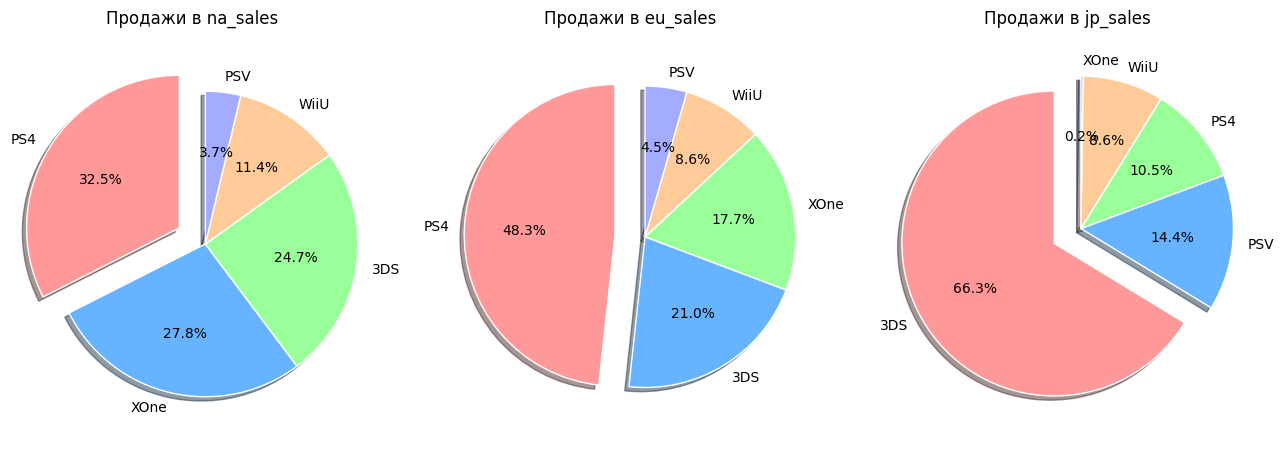

In [120]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

#Задаём переменные 
i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.2, 0, 0, 0, 0)

#Задаём набор цветов
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#a3acff']

#Цикл для вывода диаграмм распределения жанров 
for i in [0,1,2]:
    labels = top_5platform_dict[region[i]].index
    sizes = top_5platform_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  
plt.show()

Из топ пять платформ мы можем выделить, что в США и Европе, 1 место занимает PS4, в США-32,5%, а в Европе-48.3%, практически половина продаж приходится на данную платформу. Затем платформы, как XOne и 3DS,в зависимости от региона занимают 2 и 3 место.
Топ5 платформ в Японии заметно отличается. Тут 1 место 2/3(66,3%) продажи принадлежит 3DS. При выходе на Японский рынок стоит учитывать его особенности. Портативная игровая система 3DS производства Nintendo невероятно популярна за счет своей доступности в регоине создания.

In [121]:
#Самые популярные жанры топ5
#Самые популярные жанры (топ-5). 
games_na_genre = games_actual_5.groupby(['genre']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print(  )
print('Северная Америка Топ-5')
display(games_na_genre)

games_eu_genre = games_actual_5.groupby(['genre']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print(  )
print('Европа Топ-5')
display(games_eu_genre)
 
games_jp_genre = games_actual_5.groupby(['genre']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print(  )
print('Япония Топ-5 ')
display(games_jp_genre)


Северная Америка Топ-5


,genre,na_sales
0,Action,87.24
8,Shooter,73.96
7,Role-Playing,42.44
10,Sports,39.68
4,Platform,26.94



Европа Топ-5


,genre,eu_sales
0,Action,79.05
8,Shooter,60.53
10,Sports,39.23
7,Role-Playing,32.35
4,Platform,22.06



Япония Топ-5 


,genre,jp_sales
7,Role-Playing,54.19
0,Action,36.54
4,Platform,10.71
3,Misc,10.70
9,Simulation,10.64


In [122]:
top5genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5genre_dict[region] = games_actual_5.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
top5genre_dict

{'na_sales': genre
 Action          87.24
 Shooter         73.96
 Role-Playing    42.44
 Sports          39.68
 Platform        26.94
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          79.05
 Shooter         60.53
 Sports          39.23
 Role-Playing    32.35
 Platform        22.06
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    54.19
 Action          36.54
 Platform        10.71
 Misc            10.70
 Simulation      10.64
 Name: jp_sales, dtype: float64}

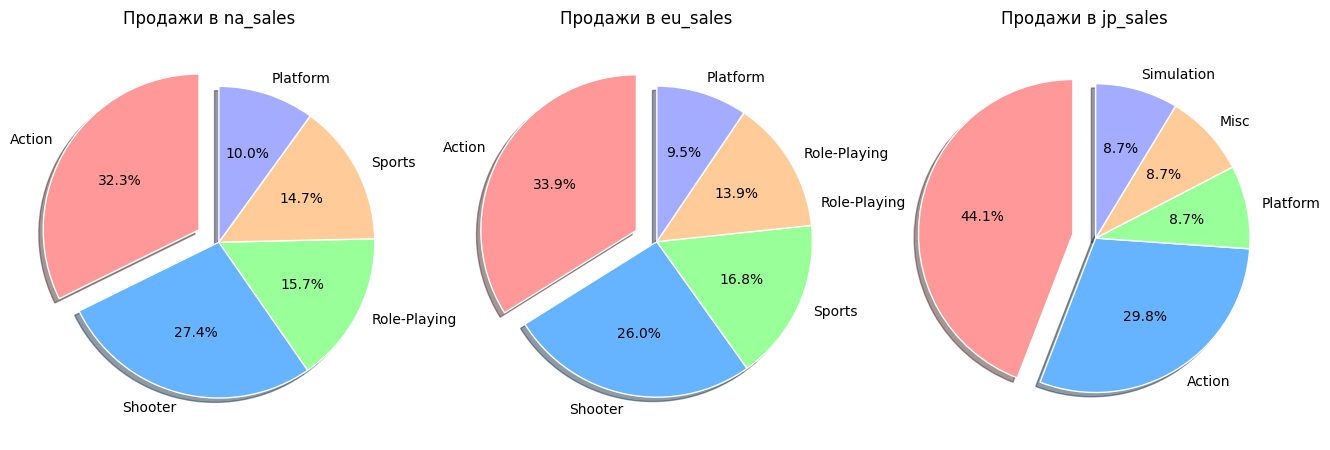

In [123]:
#Самые популярные жанры (топ-5)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

#Задаём переменные 
i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

#Задаём набор цветов
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#a3acff']

#Цикл для вывода диаграмм распределения жанров 
for i in [0,1,2]:
    labels = top5genre_dict[region[i]].index
    sizes = top5genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  

plt.show()

Топ5 жанров в США и Европе словпадает 1 мето (32-34% всех продаж) и 2 место (26-27% всех продаж) у жанров Action и Shooter соответственно. Role-Playing и Sports с примерно равным соотношением долей продаж (14-17%), в зависимости от региона жанры занимают 3 или 4 место. На 5 месте жанр Platform, около 10% от продаж.

Топ5 жанров в Японии заметно отличается. Тут 1 место и 44% продаж принадлежат жанру Role-Playing. Жанр Action занимает 2 место и 30% продаж. Жанры Platform, Misc и Simulation по 8.7% от всех продаж. При выходе на Японский рынок стоит учитывать его особенности.

In [124]:
#влияние рейтинга ESRB на продажи
games_rating = (games_actual_years
          .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],aggfunc='sum')
          )
games_rating


,eu_sales,jp_sales,na_sales
rating,,,
E,141.73,36.68,170.59
E10+,78.00,11.23,117.72
M,250.26,26.14,308.45
RP,0.03,0.00,0.00
T,83.16,33.39,109.31


In [125]:
games_actual_years.groupby(['rating']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)


,rating,na_sales
2,M,308.45
0,E,170.59
1,E10+,117.72
4,T,109.31
3,RP,0.00


In [126]:
games_actual_years.groupby(['rating']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)


,rating,eu_sales
2,M,250.26
0,E,141.73
4,T,83.16
1,E10+,78.00
3,RP,0.03


In [127]:
games_actual_years.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)

,rating,jp_sales
0,E,36.68
4,T,33.39
2,M,26.14
1,E10+,11.23
3,RP,0.00


In [128]:
games_actual_years.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)


,rating,jp_sales
0,E,36.68
4,T,33.39
2,M,26.14
1,E10+,11.23
3,RP,0.00


Можно сказать, что чем шире возрастные рамки, тем больше продаж. В США и Европе больше покупок совершается в играх 17+, тогда как в Японии кроме общего "Для всех" лидирует более младшая группа 13-19 лет. Игры 10+ тоже довольно популярны, в США они даже на 3м месте.

Вывод:
В Северной Америке и Европе очень схожий портрет пользователя:

Топ5 платформы PS4, XOne, 3DS, WiiU и PSV с небольшой разницей в распределении продаж.
самые популярные жанры - Action, Shooter, Sports, Role-Playing и Platform
большая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг E - everyone - для всех. Затем идут в примерно равных долях E10+ (Everyone 10+) — для всех старше 10 лет и T (Teen) — для подростков 13-19 лет
Портрет пользователя в Японии заметно отличается:

лидирует местная платформа: 66,3% продаж принадлежит платформе 3DS. Платформы PSV, PS4 и WiiU составляют 14.4%, 10.5% и 8.6% соответственно
1 место и 44% продаж принадлежат жанру Role-Playing. Жанр Action занимает 2 место и 30% продаж. Жанры Platform, Misc и Simulation по 8.7% от всех продаж.
в примерно равной популярности рейтинги E - everyone - для всех и T (Teen) — для подростков 13-19 лет. На 3 месте M (Mature 17+) — от 17 лет. При выходе на Японский рынок стоит учитывать его особенности.

In [129]:
#Проверка гипотез#Сформируем данные для проверки гипотезы
xone = games_actual_years.query(' platform == "XOne" ')['user_score'].dropna().to_list()
pc = games_actual_years.query(' platform == "PC" ')['user_score'].dropna().to_list()

#Рассчитаем средние значения
xone_mean = games_actual_years.query(' platform == "XOne" ')['user_score'].mean()
pc_mean = games_actual_years.query(' platform == "PC" ')['user_score'].mean()

print('Средний пользовательский рейтинг Xbox One: {:.3}\n'
     'Средний пользовательский рейтинг PC: {:.2}'.format(xone_mean, pc_mean))


Средний пользовательский рейтинг Xbox One: 6.52
Средний пользовательский рейтинг PC: 6.5


In [130]:
#Рассчитаем дисперсии
print('Дисперсия XOne =', np.var(xone))    
print('Дисперсия PC =',  np.var(pc))


Дисперсия XOne = 1.8965188383045526
Дисперсия PC = 2.5878388099608483


Сформулируем гипотезы:

H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1: средние пользовательские рейтинги платформ Xbox One и PC различаются

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются примерно на 27%. Критический уровень значимости 0.01. Пусть вероятность правильности вывода будет 99% и больше

In [131]:
alpha = .01

results = st.ttest_ind(
    xone, 
    pc,
    nan_policy='omit', 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


Вывод:
Не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов у платформ Xbox One и PC , а значит средние пользовательские рейтинги с большой вероятность равны.
Как мы выяснили ранее, средний пользовательский рейтинг для PC 6.5, а для Xbox One 6.52, что подтверждает нашу проверку.

In [132]:
#Средние пользовательские рейтинги жанров Action и Sports разные
#Сформируем данные для проверки гипотезы
action = games_actual_years.query('genre == "Action"')['user_score'].dropna().to_list()
sports = games_actual_years.query('genre == "Sports"')['user_score'].dropna().to_list()

#Рассчитаем средние значения
action_mean = games_actual_years.query('genre == "Action"')['user_score'].mean()
sports_mean = games_actual_years.query('genre == "Sports"')['user_score'].mean()

print('Средний пользовательский рейтинг Action: {:.3}\n'
     'Средний пользовательский рейтинг Sports: {:.2}'.format(action_mean, sports_mean))

Средний пользовательский рейтинг Action: 6.78
Средний пользовательский рейтинг Sports: 5.7


In [133]:
#Рассчитаем дисперсии
print('Дисперсия XOne =', np.var(action))    
print('Дисперсия PC =',  np.var(sports))

Дисперсия XOne = 1.8091482798664535
Дисперсия PC = 2.87079202194461


Сформулируем гипотезы:

H0: cредние пользовательские рейтинги жанров Action и Sports одинаковые
H1: средние пользовательские рейтинги жанров Action и Sports разные

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются примерно на 34%. Критический уровень значимости 0.01. Пусть вероятность правильности вывода будет 99% и больше

In [134]:
alpha = .01

results = st.ttest_ind(
    action, 
    sports, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


Вывод:
Отвергаем гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, а значит средние пользовательские рейтинги с большой вероятность отличаются.
Так как гипотеза двухсторонняя, то сама проверка не даёт нам понять в какую именно сторону оно отличается.
Но как мы уже выяснили ранее: средний пользовательский рейтинг жанра Action 6.78, а для Sports 5.7.

# Общий вывод



В ходе исследования рынка компьютерных игр мы обработали массивов данных:

заменили названия столбцов
преобразовали типы данных в нужные
обработали пропуски
посчитали суммарные продажи во всех регионах в новый столбец
На этапе исследования данных нам удалось выяснить, что:

актуальный период, данные которого помогут построить прогноз на 2017 - это 2011 - 2016 годы
самые перспективные платформы: PS4, XOne и WiiU
оценки критиков и пользователей не имеют выраженного влияния на объемы продаж, но оценки влияют друг на друга
самые продаваемые жанры: Action, Role-Playing, именно в этих жанрах подавляющее большинство игр. Игры в жанре Shooter на 2м месте по продажам, но его представляет куда меньшее количество игр. В зависимости от цены создания игры в этом жанре, он может быть перспективной прибыльной и свободной нишей или же оказаться неприбыльным и оттого в нём мало конкурентов.
Портрет пользователей в Америке и Европе схож, но заметно отличается от Японии:

В Америке и Европе самые популярные платформы - PS4, XOne, 3DS. И игры с жанрами - Action, Shooter.
Большая доля продаж приходится на рейтингM (Mature 17+) — от 17 лет, далее по популярности рейтинг E - everyone - для всех.
В Японии свои особые предпочтения в плане видеоигр, максимально популярны ролевые видеоигры, а платформа - 3DS.
В результате проверок гипотез, мы выяснили, ччто:

Cредние пользовательские рейтинги платформ Xbox One и PC не различаются
Cредние пользовательские рейтинги жанров Action и Sports различаются
Рекомендации:
Целью исследования было веявление определяющих успешность игры закономерностей, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на предстоящий год.

Можно дать следующие рекомендации для планирования рекламных кампаний:

Ставку лучше делать на игры для приставок/консолей.
Важно учитывать региональные предпочтения к платформам и жанрам, при выходе на новый рынок. Помнить, что чем шире возрастной рейтинг, тем больше продаж.